## Prosper Loan Data Analysis by Victor Somadina


### Introduction

This dataset contains a total of 81 columns and 113,937 rows. You can click the below to see the description of the various columns.


https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [80]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading dataset into 'loan_data' dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

### Preliminary Wrangling 


In [3]:
# Checking no of rows and columns
loan_data.shape

(113937, 81)

In [4]:
# Assessing first 5 rows
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Assessing last 5 rows
loan_data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# checking null values in Term column
loan_data['Term'].isna().any()

False

In [7]:
# using .info to check for null values and datatypes 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
loan_data['LoanFirstDefaultedCycleNumber'].isna()

0         True
1         True
2         True
3         True
4         True
          ... 
113932    True
113933    True
113934    True
113935    True
113936    True
Name: LoanFirstDefaultedCycleNumber, Length: 113937, dtype: bool

In [9]:
# checking null values across a columns
loan_data.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [10]:
# checking our columns to see the needed columns
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [11]:
# Subsetting the columns and storing into loan_data_updated dataframe.
loan_data_updated = loan_data[['ListingNumber', 'ListingCreationDate', 'Term', 
                               'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
                               'ProsperScore', 'ListingCategory (numeric)','BorrowerState', 'Occupation',
                               'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',  
                               'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment', 
                               'TotalInquiries','CurrentDelinquencies', 'AmountDelinquent', 
                               'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
                               'StatedMonthlyIncome','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination',  
                               'LoanOriginalAmount','LoanOriginationDate', 'MonthlyLoanPayment',
                               'PercentFunded', 'Recommendations','Investors']]

#### Data Assessment

In [12]:
loan_data_updated

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,0,CO,...,True,3083.333333,0,78,9425,2007-09-12 00:00:00,330.43,1.0,0,258
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.000000,0,0,10000,2014-03-03 00:00:00,318.93,1.0,0,1
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,0,GA,...,True,2083.333333,0,86,3001,2007-01-17 00:00:00,123.32,1.0,0,41
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.000000,0,16,10000,2012-11-01 00:00:00,321.45,1.0,0,158
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9583.333333,0,6,15000,2013-09-20 00:00:00,563.97,1.0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,36,Current,0.22354,0.1864,0.1764,5.0,1,IL,...,True,4333.333333,0,11,10000,2013-04-22 00:00:00,364.74,1.0,0,1
113933,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,8.0,7,PA,...,True,8041.666667,0,28,2000,2011-11-07 00:00:00,65.57,1.0,0,22
113934,1069178,2013-12-13 05:49:12.703000000,60,Current,0.23984,0.2150,0.2050,3.0,1,TX,...,True,2875.000000,0,3,10000,2013-12-23 00:00:00,273.35,1.0,0,119
113935,539056,2011-11-14 13:18:26.597000000,60,Completed,0.28408,0.2605,0.2505,5.0,2,GA,...,True,3875.000000,0,28,15000,2011-11-21 00:00:00,449.55,1.0,0,274


In [13]:
loan_data_updated['IncomeRange']

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
               ...      
113932    $50,000-74,999
113933    $75,000-99,999
113934    $25,000-49,999
113935    $25,000-49,999
113936    $50,000-74,999
Name: IncomeRange, Length: 113937, dtype: object

In [14]:
# checking for general data information and datatypes specifically
print(loan_data_updated.info())
print(loan_data_updated.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   ListingCreationDate          113937 non-null  object 
 2   Term                         113937 non-null  int64  
 3   LoanStatus                   113937 non-null  object 
 4   BorrowerAPR                  113912 non-null  float64
 5   BorrowerRate                 113937 non-null  float64
 6   LenderYield                  113937 non-null  float64
 7   ProsperScore                 84853 non-null   float64
 8   ListingCategory (numeric)    113937 non-null  int64  
 9   BorrowerState                108422 non-null  object 
 10  Occupation                   110349 non-null  object 
 11  EmploymentStatus             111682 non-null  object 
 12  IsBorrowerHomeowner          113937 non-null  bool   
 13 

In [15]:
# checking for null values 
loan_data_updated.isnull().sum()

ListingNumber                      0
ListingCreationDate                0
Term                               0
LoanStatus                         0
BorrowerAPR                       25
BorrowerRate                       0
LenderYield                        0
ProsperScore                   29084
ListingCategory (numeric)          0
BorrowerState                   5515
Occupation                      3588
EmploymentStatus                2255
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
OpenRevolvingAccounts              0
OpenRevolvingMonthlyPayment        0
TotalInquiries                  1159
CurrentDelinquencies             697
AmountDelinquent                7622
DebtToIncomeRatio               8554
IncomeRange                        0
IncomeVerifiable                   0
StatedMonthlyIncome                0
LoanCurrentDaysDelinquent          0
LoanMonthsSinceOrigination         0
LoanOriginalAmount                 0
LoanOriginationDate                0
M

In [16]:
# data structure (number of rows and columns)
loan_data_updated.shape

(113937, 31)

In [17]:
# checking for duplicates
loan_data_updated.duplicated().sum()

0

In [18]:
# checking for datatypes
loan_data_updated.dtypes

ListingNumber                    int64
ListingCreationDate             object
Term                             int64
LoanStatus                      object
BorrowerAPR                    float64
BorrowerRate                   float64
LenderYield                    float64
ProsperScore                   float64
ListingCategory (numeric)        int64
BorrowerState                   object
Occupation                      object
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentlyInGroup                  bool
OpenRevolvingAccounts            int64
OpenRevolvingMonthlyPayment    float64
TotalInquiries                 float64
CurrentDelinquencies           float64
AmountDelinquent               float64
DebtToIncomeRatio              float64
IncomeRange                     object
IncomeVerifiable                  bool
StatedMonthlyIncome            float64
LoanCurrentDaysDelinquent        int64
LoanMonthsSinceOrigination       int64
LoanOriginalAmount       

In [19]:
# from the values below, the creation date for the listing have both date and time. It should have
#  just date.
print(loan_data_updated['ListingCreationDate'])
loan_data_updated[['ListingCreationDate']].dtypes

0         2007-08-26 19:09:29.263000000
1         2014-02-27 08:28:07.900000000
2         2007-01-05 15:00:47.090000000
3         2012-10-22 11:02:35.010000000
4         2013-09-14 18:38:39.097000000
                      ...              
113932    2013-04-14 05:55:02.663000000
113933    2011-11-03 20:42:55.333000000
113934    2013-12-13 05:49:12.703000000
113935    2011-11-14 13:18:26.597000000
113936    2014-01-15 09:27:37.657000000
Name: ListingCreationDate, Length: 113937, dtype: object


ListingCreationDate    object
dtype: object

In [20]:
# checking null values in prosper score column
loan_data_updated['ProsperScore'].isnull().sum()

29084

In [21]:
loan_data_updated['BorrowerAPR']

0         0.16516
1         0.12016
2         0.28269
3         0.12528
4         0.24614
           ...   
113932    0.22354
113933    0.13220
113934    0.23984
113935    0.28408
113936    0.13189
Name: BorrowerAPR, Length: 113937, dtype: float64

### Data issues 

1. Listing creation date and loan original date column should be just date values and datatypes should be in datetime datatypes instead of object. 


2. There are missing values in Loanstatus, ProperScore, state, occupation, employment status, TotalInquiries, AmountDelinquent, DebtToIncomeRatio, current delinquencies .


3. Monthly loan payment should be in whole number.


4. Some columns datatypes shuld be addressed to categorical




In [22]:
# copy data into df_clean dataframe 
df_clean = loan_data_updated.copy()

### Data Cleaning

#### Issue 1

Extracting date from Listing creation date, first recorded credit line and loan original date columns and changing the datatypes to datetime datatypes 

In [23]:
# using .head to see the creation date have time and someother unknown values 
df_clean['ListingCreationDate'].head()

0    2007-08-26 19:09:29.263000000
1    2014-02-27 08:28:07.900000000
2    2007-01-05 15:00:47.090000000
3    2012-10-22 11:02:35.010000000
4    2013-09-14 18:38:39.097000000
Name: ListingCreationDate, dtype: object

In [24]:
# converting to datetime to be able to use the .dt accessor
df_clean['ListingCreationDate'] = pd.to_datetime(df_clean['ListingCreationDate'])
df_clean['ListingCreationDate'].dtypes
df_clean['ListingCreationDate']= df_clean['ListingCreationDate'].dt.date

In [25]:
# Test to see if our code worked 
df_clean['ListingCreationDate']

0         2007-08-26
1         2014-02-27
2         2007-01-05
3         2012-10-22
4         2013-09-14
             ...    
113932    2013-04-14
113933    2011-11-03
113934    2013-12-13
113935    2011-11-14
113936    2014-01-15
Name: ListingCreationDate, Length: 113937, dtype: object

In [26]:
# convert Loan Origination Date datetype to datetime datatype and extracting just the date (year-month-day)
df_clean['LoanOriginationDate'] = pd.to_datetime(df_clean['LoanOriginationDate'])
df_clean['LoanOriginationDate']= df_clean['LoanOriginationDate'].dt.date

In [27]:
# Test to see if the code worked 
df_clean['LoanOriginationDate']

0         2007-09-12
1         2014-03-03
2         2007-01-17
3         2012-11-01
4         2013-09-20
             ...    
113932    2013-04-22
113933    2011-11-07
113934    2013-12-23
113935    2011-11-21
113936    2014-01-21
Name: LoanOriginationDate, Length: 113937, dtype: object

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   ListingCreationDate          113937 non-null  object 
 2   Term                         113937 non-null  int64  
 3   LoanStatus                   113937 non-null  object 
 4   BorrowerAPR                  113912 non-null  float64
 5   BorrowerRate                 113937 non-null  float64
 6   LenderYield                  113937 non-null  float64
 7   ProsperScore                 84853 non-null   float64
 8   ListingCategory (numeric)    113937 non-null  int64  
 9   BorrowerState                108422 non-null  object 
 10  Occupation                   110349 non-null  object 
 11  EmploymentStatus             111682 non-null  object 
 12  IsBorrowerHomeowner          113937 non-null  bool   
 13 

### Issue 2

Time to deal with the missing values contained in Loanstatus, ProperScore, state, occupation, employment status, TotalInquiries, AmountDelinquent, DebtToIncomeRatio, current delinquencies .

In [29]:
df_clean.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
0,193129,2007-08-26,36,Completed,0.16516,0.1580,0.1380,NaN,0,CO,...,True,3083.333333,0,78,9425,2007-09-12,330.43,1.0,0,258
1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.000000,0,0,10000,2014-03-03,318.93,1.0,0,1
2,81716,2007-01-05,36,Completed,0.28269,0.2750,0.2400,NaN,0,GA,...,True,2083.333333,0,86,3001,2007-01-17,123.32,1.0,0,41
3,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.000000,0,16,10000,2012-11-01,321.45,1.0,0,158
4,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9583.333333,0,6,15000,2013-09-20,563.97,1.0,0,20


In [30]:
# checking for null values 
df_clean['ProsperScore'].isnull().sum()

29084

In [31]:
# Subsetting prosper score without null values
df_clean = df_clean[df_clean['ProsperScore'].notnull()]

In [32]:
# Test
df_clean['ProsperScore'].isnull().sum()

0

In [33]:
df_clean.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.000000,0,0,10000,2014-03-03,318.93,1.0,0,1
3,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.000000,0,16,10000,2012-11-01,321.45,1.0,0,158
4,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9583.333333,0,6,15000,2013-09-20,563.97,1.0,0,20
5,1074836,2013-12-14,60,Current,0.15425,0.1314,0.1214,10.0,1,NM,...,True,8333.333333,0,3,15000,2013-12-24,342.37,1.0,0,1
6,750899,2013-04-12,36,Current,0.31032,0.2712,0.2612,2.0,1,KS,...,True,2083.333333,0,11,3000,2013-04-18,122.67,1.0,0,1


In [34]:
# check null values in DebtToIncomeRatio column
df_clean['DebtToIncomeRatio'].isnull().sum()

7296

In [35]:
df_clean['DebtToIncomeRatio']

1         0.18
3         0.15
4         0.26
5         0.36
6         0.27
          ... 
113932    0.13
113933    0.11
113934    0.51
113935    0.48
113936    0.23
Name: DebtToIncomeRatio, Length: 84853, dtype: float64

In [36]:
# change datatype to float
df_clean['DebtToIncomeRatio'] = df_clean[['DebtToIncomeRatio']].astype('float64')

In [37]:
# subsetting rows without nullvalues
df_clean = df_clean[df_clean['DebtToIncomeRatio'].notnull()]

In [38]:
df_clean.isnull().sum()

ListingNumber                     0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
BorrowerRate                      0
LenderYield                       0
ProsperScore                      0
ListingCategory (numeric)         0
BorrowerState                     0
Occupation                     1333
EmploymentStatus                  0
IsBorrowerHomeowner               0
CurrentlyInGroup                  0
OpenRevolvingAccounts             0
OpenRevolvingMonthlyPayment       0
TotalInquiries                    0
CurrentDelinquencies              0
AmountDelinquent                  0
DebtToIncomeRatio                 0
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanCurrentDaysDelinquent         0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationDate               0
MonthlyLoanPayment          

In [39]:
# drop irrelevant columns
df_clean = df_clean.drop(columns=['TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent'], axis=1)

In [40]:
df_clean.isnull().sum()

ListingNumber                     0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
BorrowerRate                      0
LenderYield                       0
ProsperScore                      0
ListingCategory (numeric)         0
BorrowerState                     0
Occupation                     1333
EmploymentStatus                  0
IsBorrowerHomeowner               0
CurrentlyInGroup                  0
OpenRevolvingAccounts             0
OpenRevolvingMonthlyPayment       0
DebtToIncomeRatio                 0
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanCurrentDaysDelinquent         0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationDate               0
MonthlyLoanPayment                0
PercentFunded                     0
Recommendations                   0
Investors                   

In [41]:
df_clean

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.000000,0,0,10000,2014-03-03,318.93,1.0,0,1
3,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.000000,0,16,10000,2012-11-01,321.45,1.0,0,158
4,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9583.333333,0,6,15000,2013-09-20,563.97,1.0,0,20
5,1074836,2013-12-14,60,Current,0.15425,0.1314,0.1214,10.0,1,NM,...,True,8333.333333,0,3,15000,2013-12-24,342.37,1.0,0,1
6,750899,2013-04-12,36,Current,0.31032,0.2712,0.2612,2.0,1,KS,...,True,2083.333333,0,11,3000,2013-04-18,122.67,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14,36,Current,0.22354,0.1864,0.1764,5.0,1,IL,...,True,4333.333333,0,11,10000,2013-04-22,364.74,1.0,0,1
113933,537216,2011-11-03,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,8.0,7,PA,...,True,8041.666667,0,28,2000,2011-11-07,65.57,1.0,0,22
113934,1069178,2013-12-13,60,Current,0.23984,0.2150,0.2050,3.0,1,TX,...,True,2875.000000,0,3,10000,2013-12-23,273.35,1.0,0,119
113935,539056,2011-11-14,60,Completed,0.28408,0.2605,0.2505,5.0,2,GA,...,True,3875.000000,0,28,15000,2011-11-21,449.55,1.0,0,274


In [42]:
# replacing all other null values contained in borrowers state, occupation and employment status with unspecified
df_clean.fillna(value='unspecified', inplace = True)

In [43]:
df_clean.isnull().sum()

ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
ProsperScore                   0
ListingCategory (numeric)      0
BorrowerState                  0
Occupation                     0
EmploymentStatus               0
IsBorrowerHomeowner            0
CurrentlyInGroup               0
OpenRevolvingAccounts          0
OpenRevolvingMonthlyPayment    0
DebtToIncomeRatio              0
IncomeRange                    0
IncomeVerifiable               0
StatedMonthlyIncome            0
LoanCurrentDaysDelinquent      0
LoanMonthsSinceOrigination     0
LoanOriginalAmount             0
LoanOriginationDate            0
MonthlyLoanPayment             0
PercentFunded                  0
Recommendations                0
Investors                      0
dtype: int64

### Issue 3 

Round up numbers in the monthlyincome and prosper score columns

In [44]:
# rounding up to the nearest decimal whole number
df_clean['StatedMonthlyIncome']=df_clean['StatedMonthlyIncome'].apply(np.ceil)

In [45]:
df_clean['StatedMonthlyIncome']

1         6125.0
3         2875.0
4         9584.0
5         8334.0
6         2084.0
           ...  
113932    4334.0
113933    8042.0
113934    2875.0
113935    3875.0
113936    4584.0
Name: StatedMonthlyIncome, Length: 77557, dtype: float64

In [46]:
df_clean['MonthlyLoanPayment']=df_clean['MonthlyLoanPayment'].apply(np.ceil)

In [47]:
df_clean['MonthlyLoanPayment']

1         319.0
3         322.0
4         564.0
5         343.0
6         123.0
          ...  
113932    365.0
113933     66.0
113934    274.0
113935    450.0
113936     65.0
Name: MonthlyLoanPayment, Length: 77557, dtype: float64

In [48]:
df_clean

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.0,0,0,10000,2014-03-03,319.0,1.0,0,1
3,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.0,0,16,10000,2012-11-01,322.0,1.0,0,158
4,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9584.0,0,6,15000,2013-09-20,564.0,1.0,0,20
5,1074836,2013-12-14,60,Current,0.15425,0.1314,0.1214,10.0,1,NM,...,True,8334.0,0,3,15000,2013-12-24,343.0,1.0,0,1
6,750899,2013-04-12,36,Current,0.31032,0.2712,0.2612,2.0,1,KS,...,True,2084.0,0,11,3000,2013-04-18,123.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14,36,Current,0.22354,0.1864,0.1764,5.0,1,IL,...,True,4334.0,0,11,10000,2013-04-22,365.0,1.0,0,1
113933,537216,2011-11-03,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,8.0,7,PA,...,True,8042.0,0,28,2000,2011-11-07,66.0,1.0,0,22
113934,1069178,2013-12-13,60,Current,0.23984,0.2150,0.2050,3.0,1,TX,...,True,2875.0,0,3,10000,2013-12-23,274.0,1.0,0,119
113935,539056,2011-11-14,60,Completed,0.28408,0.2605,0.2505,5.0,2,GA,...,True,3875.0,0,28,15000,2011-11-21,450.0,1.0,0,274


### Issue 4

Dealing with the correct datatypes 

In [49]:
df_clean.dtypes

ListingNumber                    int64
ListingCreationDate             object
Term                             int64
LoanStatus                      object
BorrowerAPR                    float64
BorrowerRate                   float64
LenderYield                    float64
ProsperScore                   float64
ListingCategory (numeric)        int64
BorrowerState                   object
Occupation                      object
EmploymentStatus                object
IsBorrowerHomeowner               bool
CurrentlyInGroup                  bool
OpenRevolvingAccounts            int64
OpenRevolvingMonthlyPayment    float64
DebtToIncomeRatio              float64
IncomeRange                     object
IncomeVerifiable                  bool
StatedMonthlyIncome            float64
LoanCurrentDaysDelinquent        int64
LoanMonthsSinceOrigination       int64
LoanOriginalAmount               int64
LoanOriginationDate             object
MonthlyLoanPayment             float64
PercentFunded            

In [50]:
# Date should be in datetime datatypes 
df_clean['ListingCreationDate'] = df_clean[['ListingCreationDate']].astype('datetime64[ns]')

In [51]:
df_clean['ListingCreationDate']

1        2014-02-27
3        2012-10-22
4        2013-09-14
5        2013-12-14
6        2013-04-12
            ...    
113932   2013-04-14
113933   2011-11-03
113934   2013-12-13
113935   2011-11-14
113936   2014-01-15
Name: ListingCreationDate, Length: 77557, dtype: datetime64[ns]

In [52]:
df_clean['LoanOriginationDate'] = df_clean[['LoanOriginationDate']].astype('datetime64[ns]')

In [53]:
df_clean['LoanOriginationDate']

1        2014-03-03
3        2012-11-01
4        2013-09-20
5        2013-12-24
6        2013-04-18
            ...    
113932   2013-04-22
113933   2011-11-07
113934   2013-12-23
113935   2011-11-21
113936   2014-01-21
Name: LoanOriginationDate, Length: 77557, dtype: datetime64[ns]

In [54]:
df_clean['ListingNumber']= df_clean[['ListingNumber']].astype(str)

In [55]:
df_clean['ListingCategory (numeric)']=df_clean['ListingCategory (numeric)'].astype('category')

In [56]:
df_clean['ListingCategory (numeric)']

1          2
3         16
4          2
5          1
6          1
          ..
113932     1
113933     7
113934     1
113935     2
113936     1
Name: ListingCategory (numeric), Length: 77557, dtype: category
Categories (20, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

In [57]:
df_clean['LoanStatus']=df_clean['LoanStatus'].astype('category')

In [58]:
df_clean['BorrowerState']= df_clean['BorrowerState'].astype('category')

In [59]:
df_clean['EmploymentStatus']= df_clean['EmploymentStatus'].astype('category')

In [60]:
df_clean['ProsperScore']= df_clean['ProsperScore'].astype('category')

In [61]:
df_clean.dtypes

ListingNumber                          object
ListingCreationDate            datetime64[ns]
Term                                    int64
LoanStatus                           category
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
ProsperScore                         category
ListingCategory (numeric)            category
BorrowerState                        category
Occupation                             object
EmploymentStatus                     category
IsBorrowerHomeowner                      bool
CurrentlyInGroup                         bool
OpenRevolvingAccounts                   int64
OpenRevolvingMonthlyPayment           float64
DebtToIncomeRatio                     float64
IncomeRange                            object
IncomeVerifiable                         bool
StatedMonthlyIncome                   float64
LoanCurrentDaysDelinquent               int64
LoanMonthsSinceOrigination        

In [62]:
# Save clean data into csv file 
df_clean.to_csv('Prosper_Loan_data.csv', index=False)

# Data Visualisation

## Data overview


### What is the structure of your dataset?

In [63]:
print (df_clean.shape)
print (df_clean.dtypes)
print (df_clean.columns)

(77557, 28)
ListingNumber                          object
ListingCreationDate            datetime64[ns]
Term                                    int64
LoanStatus                           category
BorrowerAPR                           float64
BorrowerRate                          float64
LenderYield                           float64
ProsperScore                         category
ListingCategory (numeric)            category
BorrowerState                        category
Occupation                             object
EmploymentStatus                     category
IsBorrowerHomeowner                      bool
CurrentlyInGroup                         bool
OpenRevolvingAccounts                   int64
OpenRevolvingMonthlyPayment           float64
DebtToIncomeRatio                     float64
IncomeRange                            object
IncomeVerifiable                         bool
StatedMonthlyIncome                   float64
LoanCurrentDaysDelinquent               int64
LoanMonthsSinceOrigina

The clean loan data dataframe (df_clean) have a 77,557 rows and 28 columns which include: ListingNumber, ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate,LenderYield, ProsperScore, ListingCategory (numeric), BorrowerState, occupation, EmploymentStatus, IsBorrowerHomeowner, CurrentlyInGroup, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanMonthsSinceOrigination, LoanOriginalAmount,LoanOriginationDate, MonthlyLoanPayment, PercentFunded, Recommendations, Investors.

## What is the main feature of interest in your dataset??

In [64]:
df_clean

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,Recommendations,Investors
1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,7.0,2,CO,...,True,6125.0,0,0,10000,2014-03-03,319.0,1.0,0,1
3,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,9.0,16,GA,...,True,2875.0,0,16,10000,2012-11-01,322.0,1.0,0,158
4,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,4.0,2,MN,...,True,9584.0,0,6,15000,2013-09-20,564.0,1.0,0,20
5,1074836,2013-12-14,60,Current,0.15425,0.1314,0.1214,10.0,1,NM,...,True,8334.0,0,3,15000,2013-12-24,343.0,1.0,0,1
6,750899,2013-04-12,36,Current,0.31032,0.2712,0.2612,2.0,1,KS,...,True,2084.0,0,11,3000,2013-04-18,123.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14,36,Current,0.22354,0.1864,0.1764,5.0,1,IL,...,True,4334.0,0,11,10000,2013-04-22,365.0,1.0,0,1
113933,537216,2011-11-03,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,8.0,7,PA,...,True,8042.0,0,28,2000,2011-11-07,66.0,1.0,0,22
113934,1069178,2013-12-13,60,Current,0.23984,0.2150,0.2050,3.0,1,TX,...,True,2875.0,0,3,10000,2013-12-23,274.0,1.0,0,119
113935,539056,2011-11-14,60,Completed,0.28408,0.2605,0.2505,5.0,2,GA,...,True,3875.0,0,28,15000,2011-11-21,450.0,1.0,0,274


I'm interested in understanding how Investors affect borrowing amount and what determines the amount to be given out to a borrower.

Main features: **Investors and Loan original amount**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**Monthly Loan Payment,
  Stated Monthly Income, Is home owner, Borrower rate.**

## Univariate Exploration

In [65]:
# define a function for the xlabel,ylabel and title
def x_y_t(xlabel,ylabel,title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### Question 1: Distribution of the monthly loan payment

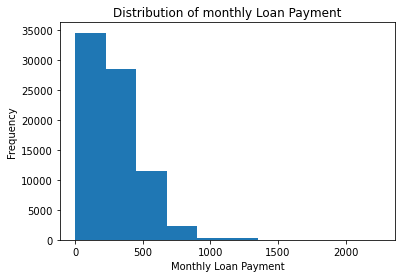

In [66]:
# call function 
plt.hist(data=df_clean, x='MonthlyLoanPayment')
x_y_t('Monthly Loan Payment','Frequency','Distribution of monthly Loan Payment')
plt.show()

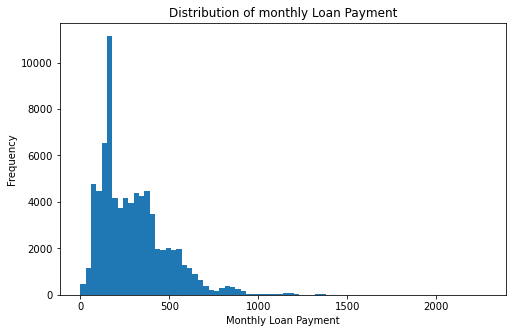

In [67]:
plt.figure(figsize=[8,5])
# Plotting a correctly scaled histogram by setting binsize
binsize = 30
bins = np.arange(0, df_clean['MonthlyLoanPayment'].max()+binsize, binsize)
plt.hist(data=df_clean, x='MonthlyLoanPayment', bins=bins)
x_y_t('Monthly Loan Payment', 'Frequency', 'Distribution of monthly Loan Payment')
plt.show()

#### Observation
The monthly loan payment distribution is right skewed and unimodal. Most Loan payments in below below and is seen within the range from 0 to 500

#### Question 2: Check the distribution of the original loan amount??

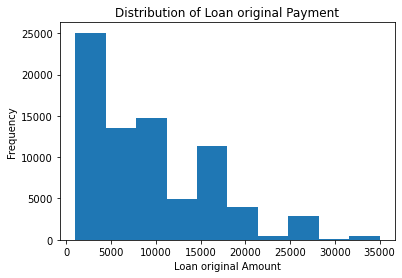

In [68]:
plt.hist(data=df_clean, x='LoanOriginalAmount')
x_y_t('Loan original Amount', 'Frequency', 'Distribution of Loan original Payment')
plt.show()

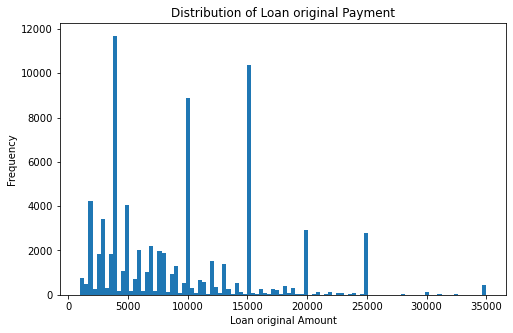

In [69]:
plt.figure(figsize=[8, 5])
plt.hist(data=df_clean, x='LoanOriginalAmount', bins=100)
x_y_t('Loan original Amount', 'Frequency', 'Distribution of Loan original Payment')
plt.show()

#### Observation
The distribution above shows that most loans are at the range of 4000, 10000, and 1500 hence the distribution is trimodal

#### Question 3: To see the disribution of whether the borrowers owns a house or not

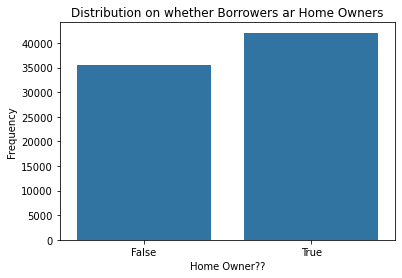

In [70]:
# Setting a single color palette
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='IsBorrowerHomeowner', color=base_color)
x_y_t('Home Owner??', 'Frequency', 'Distribution on whether Borrowers ar Home Owners')
plt.show()

#### Observation
From the visual above, it can be seen that majority of borrowers owns a house, but the difference between whether borrowers owns a house or not is not that much.

#### Question 4: Distribution Loan duration (Term)

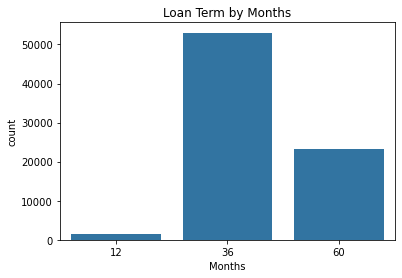

In [71]:
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='Term', color=base_color)
plt.title('Loan Term by Months')
plt.xlabel('Months')
plt.show()

#### Observation
Most loans are given in duration of 3 years (36 Months)

#### Question 5: Distribution of Employment Status

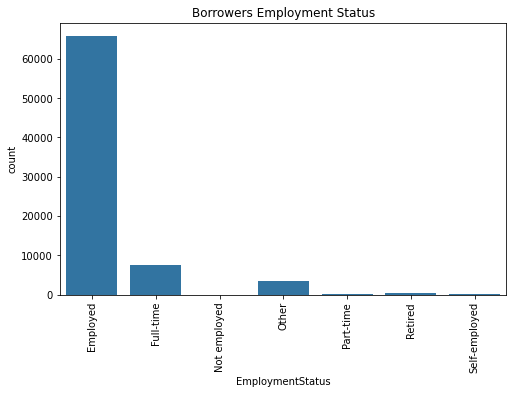

In [72]:
# setting figsize
plt.figure(figsize = [8,5])
base_color = sns.color_palette()[0]
sns.countplot(data=df_clean, x='EmploymentStatus', color=base_color)
plt.xticks(rotation=90)
plt.title('Borrowers Employment Status')
plt.show()

In [73]:
df_clean['EmploymentStatus'].value_counts()

Employed         65884
Full-time         7585
Other             3526
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

#### observation 
Majority of the borrowers are employed and on full time employment

#### Question 6: To check the distribution of the debt to income ratio column shown in percentage

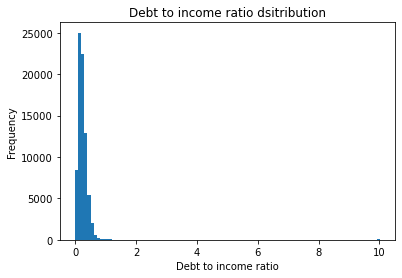

In [74]:
plt.hist(data=df_clean, x='DebtToIncomeRatio', bins=100)
x_y_t('Debt to income ratio', 'Frequency', 'Debt to income ratio dsitribution')
plt.show()

In [75]:
df_clean['DebtToIncomeRatio']

1         0.18
3         0.15
4         0.26
5         0.36
6         0.27
          ... 
113932    0.13
113933    0.11
113934    0.51
113935    0.48
113936    0.23
Name: DebtToIncomeRatio, Length: 77557, dtype: float64

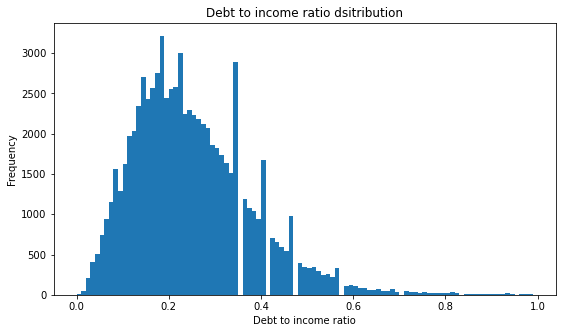

In [76]:
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[9,5])
plt.hist(data=df_clean, x='DebtToIncomeRatio', bins=bins)
x_y_t('Debt to income ratio', 'Frequency', 'Debt to income ratio dsitribution')
plt.show()

#### Observation
As seen from the chart above, a large frequency is seen between 0.2(20%) to approximately 0.4(40%). The chart is skewed to the right as well

#### Question 7: I want to find out how the Loan Status is distributed 

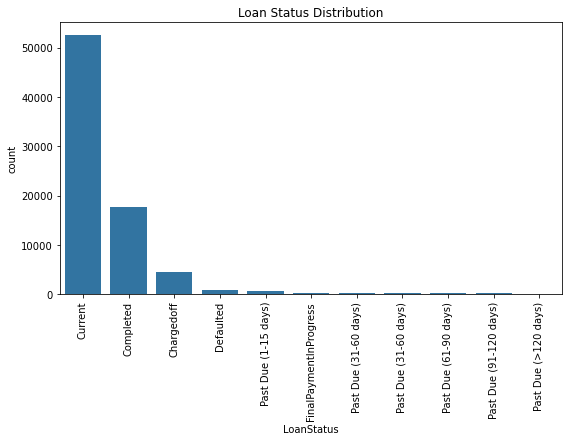

In [77]:
# base_color = sns.color_palette()[0]
plt.figure(figsize=[9,5])
# Sorting accordingly
order=['Current', 'Completed','Chargedoff','Defaulted','Past Due (1-15 days)','FinalPaymentInProgress','Past Due (31-60 days)',
       'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
sns.countplot(data=df_clean, x='LoanStatus', color=base_color, order=order)
plt.xticks(rotation=90)
plt.title("Loan Status Distribution")
plt.show()

#### Observation
Most recorded Loans are currently ongoing 

#### Question 8: Checking the distribution of Prosper score column as it is a vital variable in our analysis

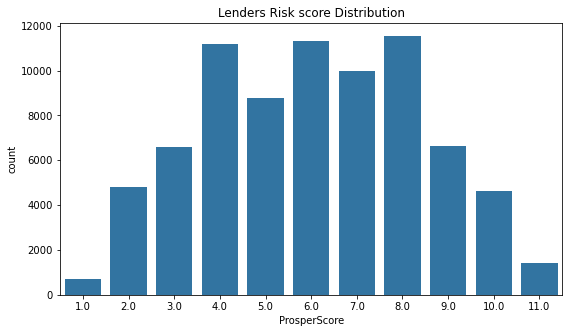

In [81]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[9,5])
sns.countplot(data=df_clean, x='ProsperScore', color=base_color)
# Setting yscale to linear 
plt.yscale('linear')
plt.title('Lenders Risk score Distribution')
plt.show()

In [82]:
df_clean['ProsperScore'].value_counts()

8.0     11543
6.0     11309
4.0     11164
7.0      9966
5.0      8776
9.0      6625
3.0      6580
2.0      4822
10.0     4639
11.0     1412
1.0       721
Name: ProsperScore, dtype: int64

#### Observation: From what I observed, the risk score is highly distributed in the 4, 6 and 8 score. This means that the risk of lending money to the borrowers is moderate 

### Were there any unusual points? Did you need to perform any transformations?

Initially I noticed an outlier at score number 6.0 in the Prosper risk score visual. After a close inspection, I found out that the mistake was from my end as i tried to replace the null values in the prosperscore column with the mean(approximately 6.0). I corrected this and subsetted instead. For the distribution of the listing category(Numeric), the distribution at value 1 is ay above others, but no wrangling could be done to change thi, so i didnt perform any transformation here.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The only unusual behavior/distribution noticed was as a result of an improper cleaning technique which i took care  of as stated above.


## Bivariate Exploration

#### Question 1: I want to know the relationship between my two main features ( monthly loan payment and loan original amount)

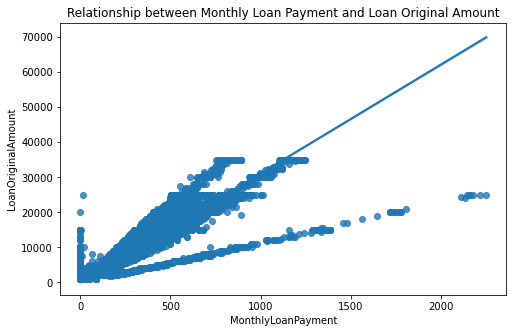

In [83]:
plt.figure(figsize=[8,5])
sns.regplot(data=df_clean, x='MonthlyLoanPayment', y='LoanOriginalAmount')
plt.title('Relationship between Monthly Loan Payment and Loan Original Amount')
plt.show()

#### Observation

They are positively correlated meaning that as the loan original amount increase, monthly loan payment increase as well.

#### Question 2: Checking for relationship between monthly loan payment and debt income ratio

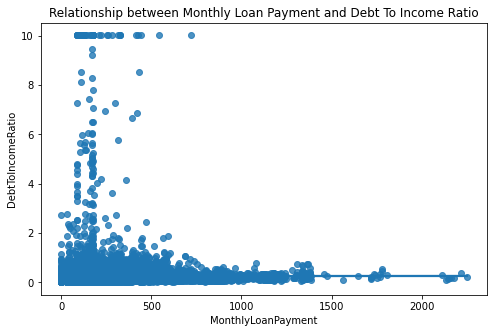

In [84]:
plt.figure(figsize=[8,5])
sns.regplot(data=df_clean, x='MonthlyLoanPayment', y='DebtToIncomeRatio')
plt.title('Relationship between Monthly Loan Payment and Debt To Income Ratio')
plt.show()

#### Observation: No correlation was seen here.

#### Question 3: understanding the employment status by months of loan rendered

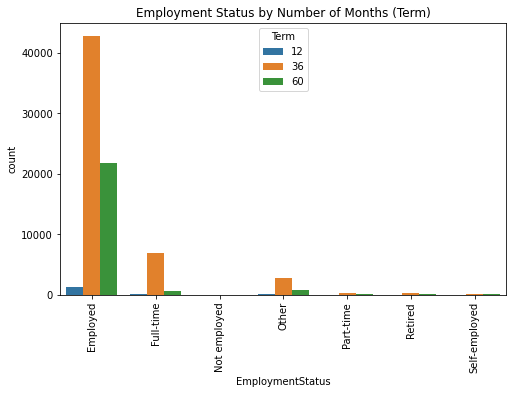

In [85]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_clean, x='EmploymentStatus', hue='Term')
plt.xticks(rotation=90)
plt.title('Employment Status by Number of Months (Term)')
plt.show()

#### Observation: Highest month of loan rendered are found in employed borrowers

#### Question 4: To understand the loan original amount by the different occupations

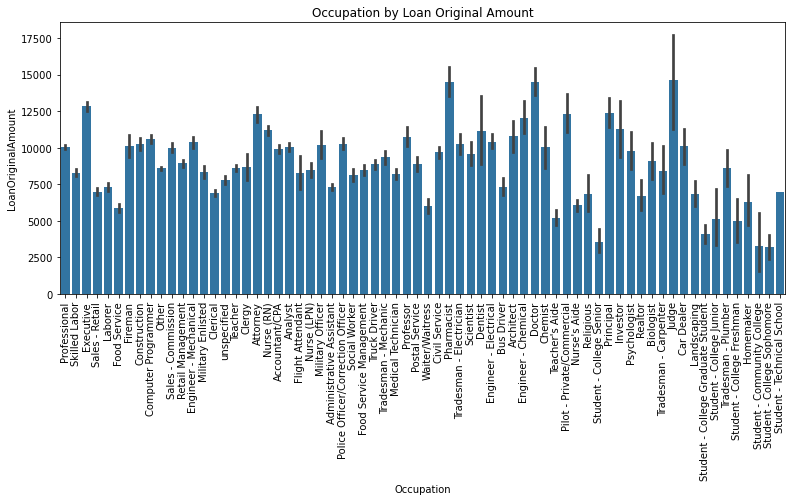

In [86]:
plt.figure(figsize=[13,5])
sns.barplot(data=df_clean, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=90)
plt.title('Occupation by Loan Original Amount')
plt.show()

### Observation

Pharmacist, Doctors and judge are the 3 occupation with the highest loan original amount. Meaning that highest loan amount are given to the mentioned professionals.

#### Question 5: I want to understand the relationship between investors and laon original amount.

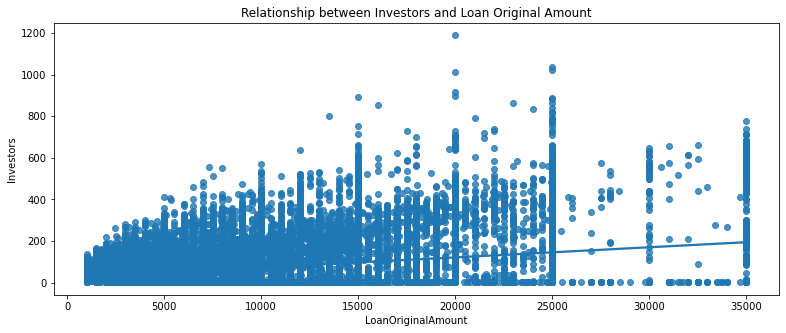

In [87]:
plt.figure(figsize=[13,5])
sns.regplot(data=df_clean, x='LoanOriginalAmount', y='Investors', color=base_color)
plt.title('Relationship between Investors and Loan Original Amount')
plt.show()

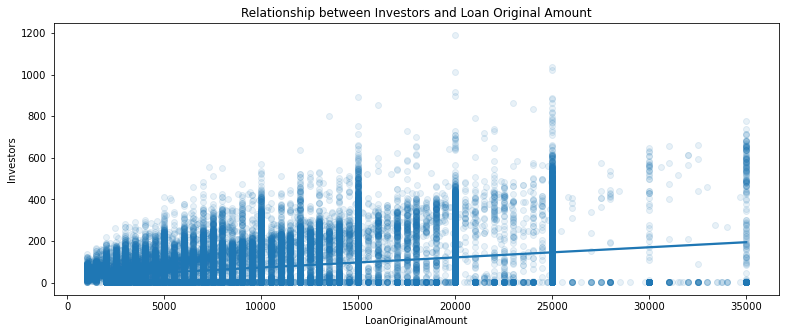

In [88]:
plt.figure(figsize=[13,5])
plt.title('Relationship between Investors and Loan Original Amount')
sns.regplot(data=df_clean, x='LoanOriginalAmount', y='Investors', color=base_color, x_jitter=0.3, scatter_kws=({'alpha':1/10}));

#### Observation
Investors positively affect the loan original amount as the number of investors increases, loan original amount increase

#### Question 6: Understanding the relationship between monthly loan payment and investors

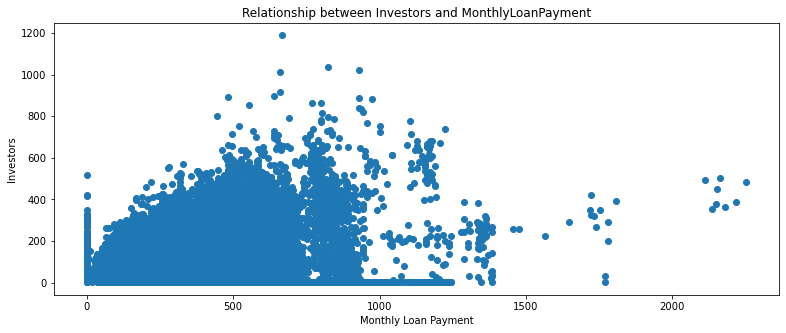

In [89]:
plt.figure(figsize=[13,5])
plt.scatter(data=df_clean, x='MonthlyLoanPayment', y='Investors', color=base_color)
x_y_t('Monthly Loan Payment', 'Investors', 'Relationship between Investors and MonthlyLoanPayment')
plt.show()

#### Observation: No visible correlation between the 2 variables

#### Question 7:  Investors vs debt to income ratio

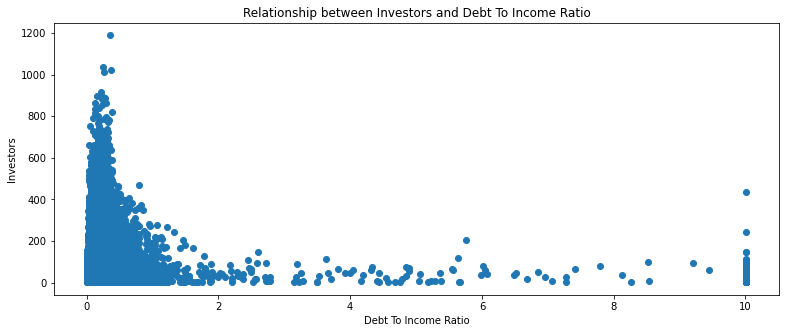

In [90]:
plt.figure(figsize=[13,5])
plt.scatter(data=df_clean, x='DebtToIncomeRatio', y='Investors', color=base_color)
x_y_t('Debt To Income Ratio', 'Investors', 'Relationship between Investors and Debt To Income Ratio')
plt.show()

#### Observation: No relationship seen in this visual

#### Question 8: I want to understand if there is a relationship between stated monthly income and monthly loan payment

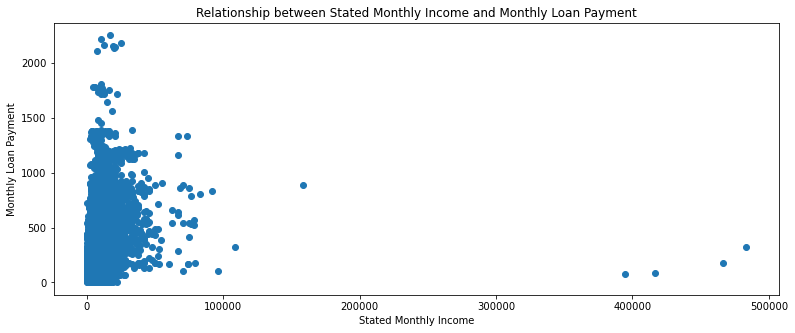

In [91]:
plt.figure(figsize=[13,5])
plt.scatter(data=df_clean, x='StatedMonthlyIncome', y='MonthlyLoanPayment', color=base_color)
x_y_t('Stated Monthly Income', 'Monthly Loan Payment', 'Relationship between Stated Monthly Income and Monthly Loan Payment')
plt.show()

#### observation
some outliers was seen here. There is no correlation between the two variables.

### Question 9: To see relationship between risk score and loan amount

<Figure size 936x360 with 0 Axes>

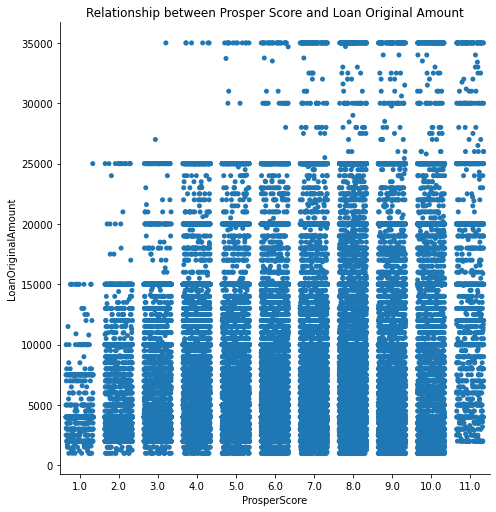

In [92]:
plt.figure(figsize=[13,5])
g=sns.FacetGrid(data=df_clean, size=7)
g.map(sns.stripplot, 'ProsperScore', 'LoanOriginalAmount', jitter=0.35)
x_y_t('ProsperScore', 'LoanOriginalAmount', 'Relationship between Prosper Score and Loan Original Amount')
plt.show()

There is a positive relationship between the two variables visualized above

#### Question 9: Let's move on to looking at how Loan Original Amount and StatedMonthlyIncome correlate with the categorical variables.

<Figure size 864x1080 with 0 Axes>

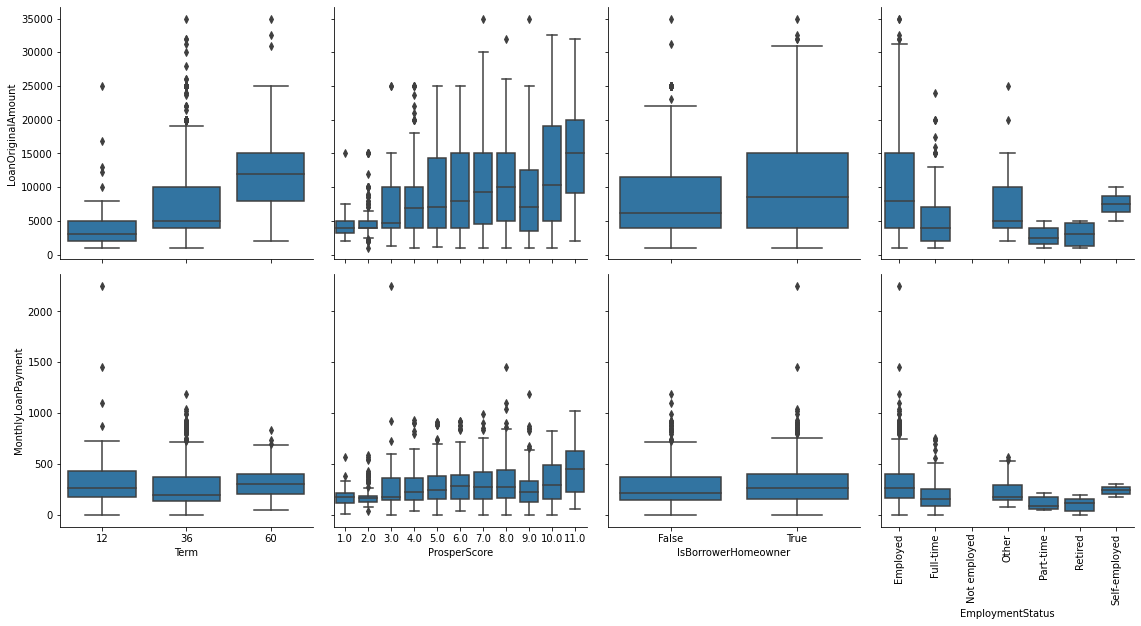

In [96]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.


df_clean_samp = df_clean.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=base_color);

plt.figure(figsize = [12, 15])
g = sns.PairGrid(data = df_clean_samp, y_vars = ['LoanOriginalAmount','MonthlyLoanPayment'], x_vars = ['Term','ProsperScore', 'IsBorrowerHomeowner',
                                                                                            'EmploymentStatus'],
                size= 4, aspect = 1.0);

g.map(boxgrid);
plt.xticks(rotation=90);

#### Observation
Interestingly, there is a positive relationship between the Categorical variables and the two numeric variables of interest.

Borrowers with the features (Longer Loan Term , best Prosper score/low risk, Home Owners, Employed) gets the Highest Loan Amount.
Borrowers with best Prosper Score(low risk), Employed or owning a home, tend to pay higher Loan Payment monthly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶

The number of investors positively affects the loan original amount unlike the relationship observed between the investors and debt income ratio as well as investors and monthly loan payment. This means that the number of investors does not have relationship with other variable recorded including debt to income ratio and monthly loan payment.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I observed some outliers in visualizing the relationship between monthly loan payment (scheduled loan payment) and stated monthly income (income stated by borrower)

## Multivariate Exploration

#### Question 1: I want understand how loan original amount is affected by both prosper score and home ownership

In [97]:
import warnings


warnings.filterwarnings('ignore')

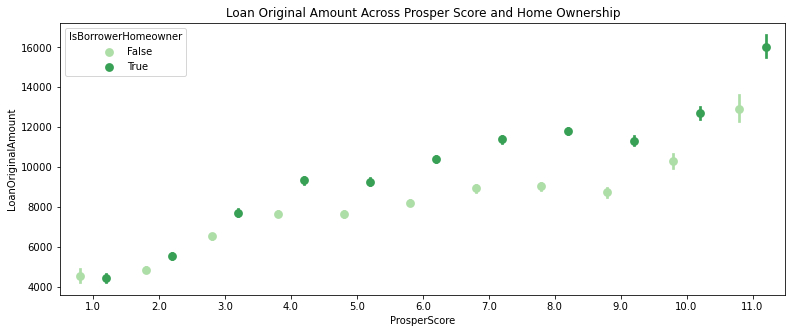

In [98]:
plt.figure(figsize=[13,5])
sns.pointplot(data = df_clean, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.show()

#### Observation: As Loan amount increases, Prosper score increases. Borrowers that are home owners have the highest number of loan amount although its nearly evenly distributed between borrowers that owns a house and those without home.

### Question 2: relationship between monthly loan payment and loan original amount by loan months (Term)

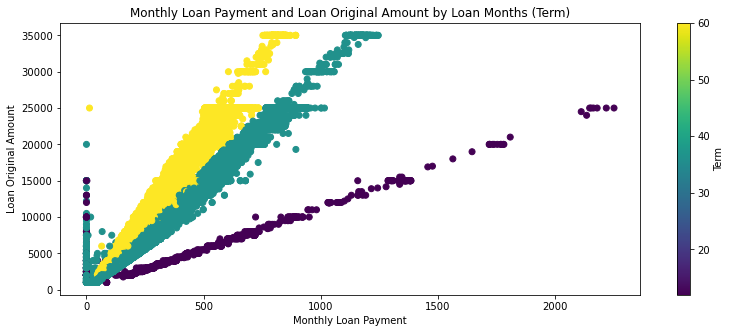

In [99]:
plt.figure(figsize=[13,5])
plt.scatter(data=df_clean, x='MonthlyLoanPayment', y='LoanOriginalAmount', c='Term')
plt.title('Monthly Loan Payment and Loan Original Amount by Loan Months (Term)')
plt.colorbar(label='Term')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount')
plt.show()

#### Observation: There is a positive correlation between the 2 variables with a categorical loan months variable.

#### Question 3: I want understand how loan original amount is affected by both Employment status and home ownership

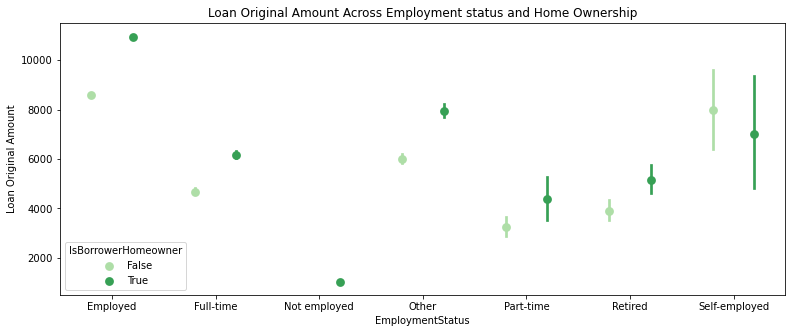

In [100]:
plt.figure(figsize=[13,5])
sns.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Employment status and Home Ownership')
plt.ylabel('Loan Original Amount')
plt.show()

#### Observation: Not employed have a home to a stand the chance of a loan deal.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As loan original amount increases, lenders risk of issuing out a loan decreases. Home ownership also affect Loan original amount.

## Conclusion

#### Main Findings


1. Pharmacist, Doctors and judge are the 3 occupations with the highest loan original amount. These are top professionals so its normal that a larger loan amount is allocated to them.


2. Number of investors and risk score (Prosper score) directly have a positive impact in the amount of loan given to a borrower. 


3. As monthly loan payment increases, original loan amount increases.


4. Most recorded loan amount are currently ongoing as of the time of entry.


5. Lenders risk score are moderate as the top risk scores are between 4, 6 and 8.


6. Distribution above shows that most loans are at the range of 4000, 10000, and 1500.


7. There is no relationship between monthly loan payment and the borrowes stated monthly income.


#### Steps taken during data exploration
The data exploration is divided into univariate, bivariate and multivariate exploration. 
Starting with the univariate analysis, I checked for the distribution of the important variables which include: Monthly loan payment, loan original amount, and debt to income ratio using histogram. I went to carryout an analysis on categorical variable (including; is borrower home owners?, prosper score, loan months, employment status). 

Over to bivariate variables, I checked for the relationship between 2 numerical variables, 2 categorical variables, a numerical and a categorical variable to derive key insights. Multivariate analysis shows Loan original amount across proper score and home ownership.
 